In [1]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=5000):
    ###############################################################################
    # make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0, n_points)]
    bumpy = [random.random() for ii in range(0, n_points)]
    error = [random.random() for ii in range(0, n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii])
         for ii in range(0, n_points)]
    for ii in range(0, len(y)):
        if grade[ii] > 0.8 or bumpy[ii] > 0.8:
            y[ii] = 1.0

# split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test = X[split:]
    y_train = y[0:split]
    y_test = y[split:]

    grade_sig = [X_train[ii][0]
                 for ii in range(0, len(X_train)) if y_train[ii] == 0]
    bumpy_sig = [X_train[ii][1]
                 for ii in range(0, len(X_train)) if y_train[ii] == 0]
    grade_bkg = [X_train[ii][0]
                 for ii in range(0, len(X_train)) if y_train[ii] == 1]
    bumpy_bkg = [X_train[ii][1]
                 for ii in range(0, len(X_train)) if y_train[ii] == 1]

    training_data = {"fast": {"grade": grade_sig, "bumpiness": bumpy_sig}, "slow": {
        "grade": grade_bkg, "bumpiness": bumpy_bkg}}

    grade_sig = [X_test[ii][0]
                 for ii in range(0, len(X_test)) if y_test[ii] == 0]
    bumpy_sig = [X_test[ii][1]
                 for ii in range(0, len(X_test)) if y_test[ii] == 0]
    grade_bkg = [X_test[ii][0]
                 for ii in range(0, len(X_test)) if y_test[ii] == 1]
    bumpy_bkg = [X_test[ii][1]
                 for ii in range(0, len(X_test)) if y_test[ii] == 1]

    test_data = {"fast": {"grade": grade_sig, "bumpiness": bumpy_sig},
                 "slow": {"grade": grade_bkg, "bumpiness": bumpy_bkg}}

    return X_train, y_train, X_test, y_test

In [2]:
#!/usr/bin/python

import base64
import json
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl


def prettyPicture(clf, X_test, y_test):
    x_min = 0.0
    x_max = 1.0
    y_min = 0.0
    y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0]
                 for ii in range(0, len(X_test)) if y_test[ii] == 0]
    bumpy_sig = [X_test[ii][1]
                 for ii in range(0, len(X_test)) if y_test[ii] == 0]
    grade_bkg = [X_test[ii][0]
                 for ii in range(0, len(X_test)) if y_test[ii] == 1]
    bumpy_bkg = [X_test[ii][1]
                 for ii in range(0, len(X_test)) if y_test[ii] == 1]

    plt.scatter(grade_sig, bumpy_sig, color="b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color="r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png",dpi=300)


def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print(image_start+json.dumps(data)+image_end)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Training data lenth is 3750
training time: 0.016 s
predicting time: 0.002 s
1108 1250
Estimator num is 5
The accuracy is 88.64 %
training time: 0.029 s
predicting time: 0.003 s
1189 1250
Estimator num is 10
The accuracy is 95.12 %
training time: 0.041 s
predicting time: 0.005 s
1194 1250
Estimator num is 15
The accuracy is 95.52 %
training time: 0.055 s
predicting time: 0.006 s
1197 1250
Estimator num is 20
The accuracy is 95.76 %
training time: 0.07 s
predicting time: 0.007 s
1197 1250
Estimator num is 25
The accuracy is 95.76 %
training time: 0.08 s
predicting time: 0.009 s
1197 1250
Estimator num is 30
The accuracy is 95.76 %
training time: 0.093 s
predicting time: 0.013 s
1199 1250
Estimator num is 35
The accuracy is 95.92 %
training time: 0.106 s
predicting time: 0.011 s
1199 1250
Estimator num is 40
The accuracy is 95.92 %
training time: 0.121 s
predicting time: 0.013 s
1199 1250
Estimator num is 45
The accuracy is 95.92 %
training time: 0.132 s
predicting time: 0.014 s
1199 1250

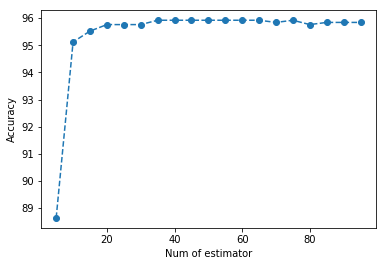

In [15]:
from time import time
from sklearn.ensemble import AdaBoostClassifier

features_train, labels_train, features_test, labels_test = makeTerrainData()
print("Training data lenth is", len(features_train))
acc_list = []
estimators_list = []
erange = range(5,100,5)
for estimators in erange:
    clf = AdaBoostClassifier(n_estimators=estimators)
    t0 = time()
    clf = clf.fit(features_train, labels_train)
    print("training time:", round(time()-t0, 3), "s")

    t1 = time()
    result = clf.predict(features_test)
    print("predicting time:", round(time()-t1, 3), "s")

    corr = 0
    for x in range(0, len(result)):
        if result[x] == labels_test[x]:
            # print "corr!"
            corr = corr + 1
    print(corr, len(result))
    num = float(len(result))
    acc = 0.0
    acc = round(corr/num*100, 3)
    print("Estimator num is", estimators)
    print("The accuracy is", acc, "%")
    acc_list.append(acc)
    estimators_list.append(estimators)
print ("The max acc is", max(acc_list))
plt.figure()
plt.plot(estimators_list, acc_list, "o--")
#prettyPicture(clf, features_test, labels_test)
#plt.legend()
plt.xlabel("Num of estimator")
plt.ylabel("Accuracy")
plt.savefig("Adaboost_acc.png",dpi=200)